In [11]:
# google  drive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
# importar librerias
#!pip install fastparquet

import numpy as np
import pandas as pd
import ast

pd.set_option('display.max_columns', None) # show alll columns

------------------

In [13]:
# get data
df = pd.read_parquet('/content/drive/MyDrive/DataYelpGoogle/Data/Cluster_CountVectorizer_KMeans.parquet')

In [4]:
# info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59292 entries, 0 to 59291
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   business_name     59292 non-null  object 
 1   rating            59292 non-null  float64
 2   review            59292 non-null  object 
 3   dataset           59292 non-null  object 
 4   review processed  59292 non-null  object 
 5   lenght review     59292 non-null  int64  
 6   lemmatization     59292 non-null  object 
 7   cluster           59292 non-null  int32  
dtypes: float64(1), int32(1), int64(1), object(5)
memory usage: 3.4+ MB


In [6]:
# show data
df.sample(5)

,business_name,rating,review,dataset,review processed,lenght review,lemmatization,cluster
40034,Rosenblum,4.0,"Meaty, smoky flavors mark this dark and full-b...",WineMagazin,meaty smoky flavor mark dark full body wine ad...,25,"[meaty, smoky, flavor, mark, dark, full, body,...",0
38239,Pomum,4.0,Herb and barrel spice aromas lead to plump che...,WineMagazin,herb barrel spice aroma lead plump cherry cran...,12,"[herb, barrel, spice, aroma, lead, plump, cher...",0
31966,Bailiwick,4.0,This wine starts out brawny and tannic before ...,WineMagazin,wine start brawny tannic find vibrant light ch...,26,"[wine, start, brawny, tannic, find, vibrant, l...",0
15218,Savage Winery-Savage@Woodcock (Savage Winery@W...,5.0,It’s so worth the drive! Will be going back w...,Google,worth drive go back town wine delicious beer menu,9,"[worth, drive, go, back, town, wine, delicious...",1
48785,Panache Cellars,4.0,This fragrant wine from an excellent vintage o...,WineMagazin,fragrant wine excellent vintage offer terrific...,19,"[fragrant, wine, excellent, vintage, offer, te...",0


In [ ]:
# en este caso la etiqueta 1 en el campo cluster serian conocedores de vino, al ejecutar el notebook GoogleYelp_Cluster este valor puede cambiar a 0, verificar siempre

------------

# Classification

In [14]:
# Seleccionar variables predictoras X - variable a predecir y
X = df['review processed']
y = df['cluster']

In [15]:
# validar balance
df['cluster'].value_counts()

0    32329
1    26963
Name: cluster, dtype: int64

In [16]:
# proporcion etiqueteas positivas variable objetivo
print('Proporcion etiquetas positivas variable objetivo: ', y.sum()/y.count())

Proporcion etiquetas positivas variable objetivo:  0.4547493759697767


In [17]:
# obtener datos de entrenamiento - datos de prueba (split)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify=y)

------------

### algoritmos

In [18]:
# tfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# LinearSVC
from sklearn.svm import LinearSVC

In [113]:
# tfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# LogisticRegression
from sklearn.linear_model import LogisticRegression

In [103]:
# tfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# RidgeClassifier
from sklearn.linear_model import RidgeClassifier

In [76]:
# tfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# MultinomialNB
from sklearn.naive_bayes import MultinomialNB

### pipeline

In [10]:
# pipeline LinearSVC
from sklearn.pipeline import Pipeline

clf_model = Pipeline([('tfidf_v', TfidfVectorizer()), ('clf_m', LinearSVC())])

In [114]:
# pipeline LogisticRegression
from sklearn.pipeline import Pipeline

clf_model = Pipeline([('tfidf_v', TfidfVectorizer()), ('clf_m', LogisticRegression())])

In [104]:
# pipeline RidgeClassifier
from sklearn.pipeline import Pipeline

clf_model = Pipeline([('tfidf_v', TfidfVectorizer()), ('clf_m', RidgeClassifier())])

In [77]:
# pipeline MultinomialNB
from sklearn.pipeline import Pipeline

clf_model = Pipeline([('tfidf_v', TfidfVectorizer()), ('clf_m', MultinomialNB())])

In [11]:
# entrenar modelo
clf_model.fit(X_train, y_train)

Pipeline(steps=[('tfidf_v', TfidfVectorizer()), ('clf_m', LinearSVC())])

In [12]:
# evaluar modelo train data
pred_train = clf_model.predict(X_train)
np.mean(pred_train == y_train)

0.9990723757721418

In [13]:
# evaluar modelo test data
pred_test = clf_model.predict(X_test)
np.mean(pred_test == y_test)

0.9866767855637069

### gridSearch

In [44]:
# Creamos la grilla de hiperparámetros para el modelo
#parameters = {'tfidf_v__ngram_range': [(1, 1), (1, 2)],
#              'clf_m__alpha': (1e-2, 1e-3)}

In [15]:
# Creamos la grilla de hiperparámetros para el modelo
parameters = {'tfidf_v__ngram_range': [(1, 1), (1, 2)],
              'clf_m__C': (0.5, 1.5),
              'clf_m__loss': ('hinge', 'squared_hinge')}

In [16]:
# GridSearch - instanciar modelo
from sklearn.model_selection import GridSearchCV

gs_clf_model = GridSearchCV(clf_model, parameters, cv=5, n_jobs=-1)

In [17]:
# entrenar modelo
gs_clf_model.fit(X_train[:1000], y_train[:1000])

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf_v', TfidfVectorizer()),
                                       ('clf_m', LinearSVC())]),
             n_jobs=-1,
             param_grid={'clf_m__C': (0.5, 1.5),
                         'clf_m__loss': ('hinge', 'squared_hinge'),
                         'tfidf_v__ngram_range': [(1, 1), (1, 2)]})

In [18]:
# mejores parametros y su metrica
print("Mejores hiperparámetros: "+str(gs_clf_model.best_params_))
print("Mejor Score: "+str(gs_clf_model.best_score_)+'\n')

Mejores hiperparámetros: {'clf_m__C': 0.5, 'clf_m__loss': 'squared_hinge', 'tfidf_v__ngram_range': (1, 1)}
Mejor Score: 0.966



In [19]:
# dataframe ranking parametros eveluados
results = pd.DataFrame(gs_clf_model.cv_results_)
results.sort_values('rank_test_score', ascending=True).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf_m__C,param_clf_m__loss,param_tfidf_v__ngram_range,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,0.047280,0.003354,0.010087,0.000455,0.5,squared_hinge,"(1, 1)","{'clf_m__C': 0.5, 'clf_m__loss': 'squared_hing...",0.960,0.970,0.970,0.980,0.950,0.966,0.010198,1
4,0.051418,0.007299,0.010028,0.000676,1.5,hinge,"(1, 1)","{'clf_m__C': 1.5, 'clf_m__loss': 'hinge', 'tfi...",0.960,0.965,0.970,0.985,0.950,0.966,0.011576,2
6,0.045291,0.002487,0.009916,0.000477,1.5,squared_hinge,"(1, 1)","{'clf_m__C': 1.5, 'clf_m__loss': 'squared_hing...",0.960,0.965,0.970,0.985,0.950,0.966,0.011576,2
0,0.078523,0.018062,0.017938,0.008540,0.5,hinge,"(1, 1)","{'clf_m__C': 0.5, 'clf_m__loss': 'hinge', 'tfi...",0.960,0.955,0.965,0.975,0.955,0.962,0.007483,4
3,0.122558,0.003357,0.015621,0.000715,0.5,squared_hinge,"(1, 2)","{'clf_m__C': 0.5, 'clf_m__loss': 'squared_hing...",0.955,0.955,0.965,0.980,0.950,0.961,0.010677,5


In [20]:
# accuracy -std
print("Accuracy: %0.3f (+/- %0.3f)" % (results.loc[results['rank_test_score'].idxmin()]['mean_test_score'], results.loc[results['rank_test_score'].idxmin()]['std_test_score']))

Accuracy: 0.966 (+/- 0.010)


In [ ]:
# resultado: 0 - review conocedor, 1 - review consumidor casual

In [22]:
# test
gs_clf_model.predict(['Great wine! Super relaxing!'])

array([1], dtype=int32)

In [23]:
# test
gs_clf_model.predict(['Great entertainment! and the wine was good'])

array([1], dtype=int32)

In [24]:
# test
gs_clf_model.predict(['A very simple Chardonnay with sour apple flavor'])

array([0], dtype=int32)

### evaluar modelo con mejores hiperparametros

In [20]:
# pipeline LinearSVC()
from sklearn.pipeline import Pipeline

clf_model = Pipeline([('tfidf_v', TfidfVectorizer(ngram_range=(1, 1))), ('clf_m', LinearSVC(C=2, loss='squared_hinge'))])

In [21]:
# entrenar modelo
clf_model.fit(X_train, y_train)

Pipeline(steps=[('tfidf_v', TfidfVectorizer()), ('clf_m', LinearSVC(C=2))])

In [22]:
# evaluar modelo
pred_test = clf_model.predict(X_test)

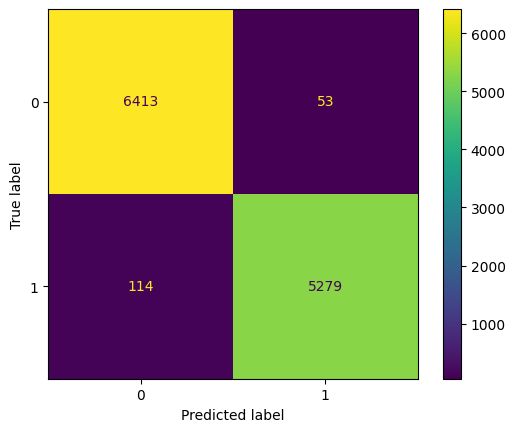

In [23]:
# Matriz de Confusion
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

matrix = confusion_matrix(y_test, pred_test)
cm_display = ConfusionMatrixDisplay(matrix)
cm_display.plot()

In [79]:
# exactitud, accuracy - total datos
from sklearn.metrics import accuracy_score

print('Exactitud:', accuracy_score(y_test, pred_test))

Exactitud: 0.9859178682856902


In [80]:
# precision
from sklearn.metrics import precision_score

print('Presicion:', precision_score(y_test, pred_test))

Presicion: 0.990060015003751


In [81]:
# exhaustividad, sensibilidad, recall - total datos
from sklearn.metrics import recall_score

print('Exhaustividad:', recall_score(y_test, pred_test))

Exhaustividad: 0.9788614871129242


In [82]:
# reporte de clasificacion
from sklearn.metrics import classification_report

reporte = classification_report(y_test, pred_test, target_names=['pro', 'non_pro'])
print('reporte de clasificacion:')
print(reporte)

reporte de clasificacion:
              precision    recall  f1-score   support

         pro       0.98      0.99      0.99      6466
     non_pro       0.99      0.98      0.98      5393

    accuracy                           0.99     11859
   macro avg       0.99      0.99      0.99     11859
weighted avg       0.99      0.99      0.99     11859



-----------

### test con datos de prueba del dataset

In [24]:
len(X_test)

11859

In [30]:
import random
index = X_test.index[random.randint(0, 11859)]
index

23172

In [31]:
df.loc[index]

business_name                        Mercer Wine Estates Tasting Room
rating                                                            4.0
review              Tasty wine with a good variety of whites and r...
dataset                                                        Google
review processed    tasty wine good variety white reds enjoy wine ...
lenght review                                                      44
lemmatization       [tasty, wine, good, variety, white, reds, enjo...
cluster                                                             1
Name: 23172, dtype: object

In [32]:
review = df['review processed'][index]
review

'tasty wine good variety white reds enjoy wine taste nice solid local option seattle excite back patio open warm friendly staff knock one star taste room lot echo make hard hear friend talk overly busy time still hard hear might benefit invest acoustic panel'

In [33]:
# test
clf_model.predict([review])

array([1], dtype=int32)